In this tutorial we will be illustrating homw to apply K Means algorithm to a dataset.We here have a data of customers who buy things at a mall.In the data set there are information like Sex,Age,Income and Spending Score.We will immplement K means clustering on the data and then see what conclusion we can arrive at.This is a work in process and I will be updating the kernel in the coming days.If you like my work please do vote.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['Mall_Customers_1.csv']


**1. Importing the Python modules**

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import warnings
warnings.filterwarnings('ignore') 

**2. Importing the dataset **

In [3]:
dataset=pd.read_csv('../input/Mall_Customers_1.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,18,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


So in the data set we have the Customer Id, Genre, Age, Annual Income and the Spending Score of the customer making purchase at the mall.Spending score of 1 means less purchase and 100 means more purchase being done by the customer.

**3. Generating Array of Features**

In [4]:
X=dataset.iloc[:,[3,4]].values # We are considering Annual income and Spending Score as the features 

**4.Using Elbow method to find the optiminal cluster number **

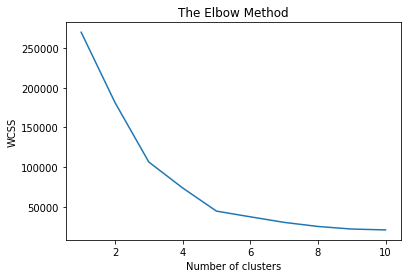

In [5]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


From the elbow curve we can see that 5 could be the optiminal number of cluster that we can use for out analysis.

**5. Applying K means to the Dataset **

In [6]:
kmeans=KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(X)

**6. Visualizing the clusters **

<function matplotlib.pyplot.show(*args, **kw)>

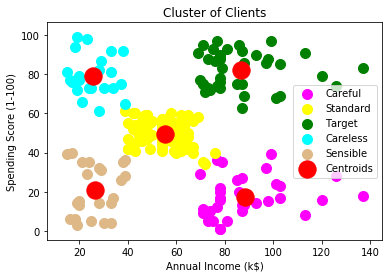

In [7]:
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='magenta',label='Careful')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='yellow',label='Standard')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='Target')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=100,c='cyan',label='Careless')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=100,c='burlywood',label='Sensible')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='red',label='Centroids')
plt.title('Cluster of Clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show

Cluster 1- High income low spending =Careful 

Cluster 2- Medium income medium spending =Standard 

Cluster 3- High Income and high spending =Target

Cluster 4- Low Income and high spending =Careless

Cluster 5- Low Income and low spending =Sensible